# This project is an application of unsupervised learning and how to use Kmeans in Clustering .

We will use " Wholesale customers data " and it is availabe on UCI datasets site


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.cluster import KMeans

In [65]:
#Loading the dataset 
customers_data=pd.read_csv("Wholesale customers data.csv")
#print the dataset headear
customers_data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Remove Channel and Region colums as they will not affect the clustering , Not likely changing among examples 

In [66]:
customers_data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
customers_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Before we go further, we should apply feature scaling to our dataset. In this example, I will simply rescale the data to a [0,5000] range .


In [67]:
customers_data_norm = 5000 * (customers_data - customers_data.min())/(customers_data.max() - customers_data.min())
customers_data_norm.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,564.700218,653.636153,407.320780,15.531523,327.135998,139.236546
1,314.495131,664.120474,515.483363,142.742095,402.949246,184.918648
2,283.108036,595.904307,413.949578,195.582145,430.261611,817.793075
3,591.272247,77.679289,227.319271,524.209454,61.728395,186.170213
4,1008.132111,364.568441,387.757742,319.669976,217.274152,540.467251


Now we should find correlation between features in the dataset 
faetures are highly correlated are good in clustering too

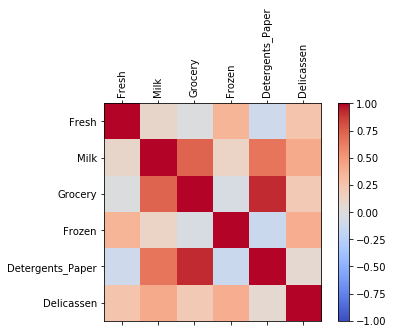

In [68]:
corr = customers_data_norm.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(customers_data_norm.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(customers_data_norm.columns)
ax.set_yticklabels(customers_data_norm.columns)
plt.show()

As we see in the above graph the darker red means higher correlation , so Grocery and  Detergents_Paper are the most too correlated variables

we use kmeans with 2 clusers 

In [69]:
kmeans_init = KMeans(n_clusters=2)
predictions = kmeans_init.fit_predict(customers_data_norm) 

kmeans = pd.DataFrame(predictions)
customers_data_norm.insert((customers_data_norm.shape[1]),'kmeans',kmeans)


as its hard to plot more than 2 features we choose 2 features for plotting the clusters

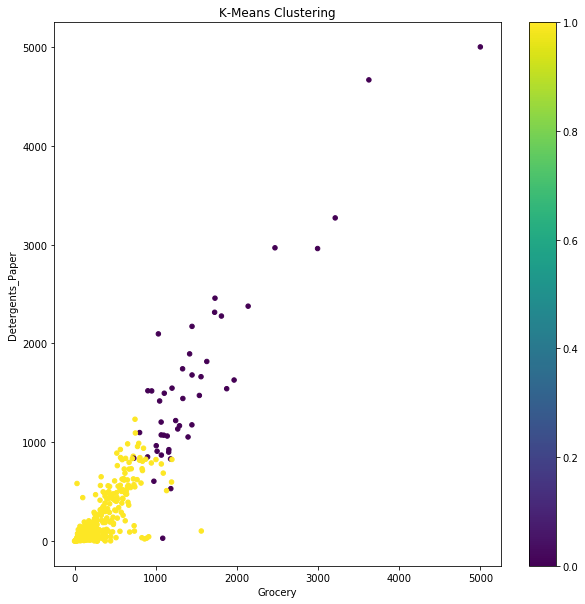

In [70]:
feature1="Grocery"
feature2="Detergents_Paper"
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(customers_data_norm[feature1],customers_data_norm[feature2],c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.colorbar(scatter)

# Conclusion :


Any customer whose ( Grocery <= 1000 & Detergents_Paper <= 1000) tends to belong to cluster 1 


and Any customer whose ( Grocery > 1000 & Detergents_Paper > 1000) tends to belong to cluster 2 
